## Image Classification - One Node Training

In [1]:
# Importing Librairies
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, InputLayer, Reshape, Rescaling
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import numpy as np
import os

# Uncomment next line to : Force using CPU only by making GPU invisible
#os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
# Importing & Preprocessing CIFAR-10 Dataset from Directory
img_height = 32
img_width = 32
data_path = './CIFAR-10/'

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


def load_dataset():
    # Loading Training Dataset
    x_train = np.empty((50000, 32, 32, 3), dtype='uint8')
    y_train = np.empty((50000, ), dtype='uint8')
    i = 1    
    while i <= 5:
        filename = 'data_batch_' + str(i)
        fullpath = os.path.join(data_path, filename)
        data_batch = unpickle(fullpath)
        
        x = data_batch[b'data']
        x_train[(i - 1) * 10000:i * 10000, :, :, :] = x.reshape(len(x), 3, img_height, img_width).transpose(0, 2, 3, 1)
        y_train[(i - 1) * 10000:i * 10000] = data_batch[b'labels']
        i = i + 1
    
    # Loading Test/Validation Dataset
    fullpath = os.path.join(data_path, 'test_batch')
    test_batch = unpickle(fullpath)
    x_test = test_batch[b'data']
    x_test = x_test.reshape(len(x_test), 3, img_height, img_width).transpose(0, 2, 3, 1)
    y_test = test_batch[b'labels']
    y_test = np.asarray(y_test)
    
    # Normalizing Images
    x_train, x_test = normalize_images(x_train, x_test)
    # Display Dataset Size
    print('Training Images : {}'.format(len(x_train)))
    print('Test Images : {}'.format(len(x_test)))
    return (x_train, y_train), (x_test, y_test)


def normalize_images(train, test):
    # convert 0-255 integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # scaling values from 0-255 to 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm


# Function : Create and Compile Model
def create_and_compile_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    optimizer = tf.keras.optimizers.Adam()
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
    accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

    # Compiling the model
    model.compile(optimizer=optimizer, loss=loss_fn, metrics=[accuracy])
    return model

In [3]:
batch_size = 128

# Create and Compile Model
model = create_and_compile_model()

# load CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = load_dataset()

# Data Augmentation Generator
datagen = ImageDataGenerator(
            #featurewise_center=True,
            #featurewise_std_normalization=True,
            #rotation_range=20,
            width_shift_range=0.2,
            height_shift_range=0.2,
            horizontal_flip=True)
datagen.fit(x_train)

# Data iterator generating training batches
iter_train = datagen.flow(x_train, y_train, batch_size=batch_size)
# Calculating Steps par Epoch
steps = int(len(x_train) / batch_size)

# Training the model without callbacks
history = model.fit(iter_train, validation_data=(x_test, y_test),
                    steps_per_epoch=steps, epochs=50)

# Evaluating the model on test dataset
score = model.evaluate(x_test, y_test)
print("test loss : {:.4f}".format(score[0]))
print("test accuracy : {:.4f}".format(score[1]))

Training Images : 50000
Test Images : 10000
Epoch 1/50
390/390 [==============================] - 23s 50ms/step - loss: 1.7870 - sparse_categorical_accuracy: 0.3326 - val_loss: 1.4514 - val_sparse_categorical_accuracy: 0.4825
Epoch 2/50
390/390 [==============================] - 19s 48ms/step - loss: 1.3700 - sparse_categorical_accuracy: 0.4980 - val_loss: 1.1443 - val_sparse_categorical_accuracy: 0.5849
Epoch 3/50
390/390 [==============================] - 18s 47ms/step - loss: 1.1523 - sparse_categorical_accuracy: 0.5861 - val_loss: 0.9600 - val_sparse_categorical_accuracy: 0.6565
Epoch 4/50
390/390 [==============================] - 19s 48ms/step - loss: 1.0162 - sparse_categorical_accuracy: 0.6344 - val_loss: 0.8861 - val_sparse_categorical_accuracy: 0.6866
Epoch 5/50
390/390 [==============================] - 18s 47ms/step - loss: 0.9023 - sparse_categorical_accuracy: 0.6808 - val_loss: 0.7891 - val_sparse_categorical_accuracy: 0.7237
Epoch 6/50
390/390 [==========================

390/390 [==============================] - 19s 49ms/step - loss: 0.3340 - sparse_categorical_accuracy: 0.8829 - val_loss: 0.4935 - val_sparse_categorical_accuracy: 0.8464
Epoch 46/50
390/390 [==============================] - 19s 47ms/step - loss: 0.3305 - sparse_categorical_accuracy: 0.8843 - val_loss: 0.5155 - val_sparse_categorical_accuracy: 0.8439
Epoch 47/50
390/390 [==============================] - 18s 47ms/step - loss: 0.3267 - sparse_categorical_accuracy: 0.8859 - val_loss: 0.4993 - val_sparse_categorical_accuracy: 0.8419
Epoch 48/50
390/390 [==============================] - 19s 48ms/step - loss: 0.3216 - sparse_categorical_accuracy: 0.8874 - val_loss: 0.5168 - val_sparse_categorical_accuracy: 0.8414
Epoch 49/50
390/390 [==============================] - 19s 48ms/step - loss: 0.3204 - sparse_categorical_accuracy: 0.8896 - val_loss: 0.5116 - val_sparse_categorical_accuracy: 0.8473
Epoch 50/50
313/313 [==============================] - 1s 4ms/step - loss: 0.5257 - sparse_catego

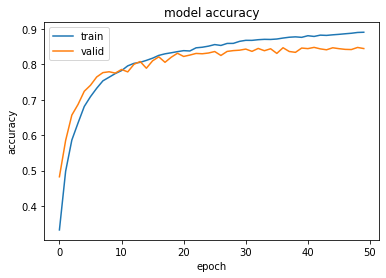

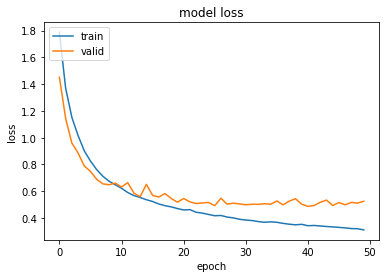

In [4]:
# plot training and validation accuracy
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
# plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [ ]:
# Summarizing model architecture
model.summary()
# visualizing model architecture
plot_model(model, to_file='./model_plot.png', show_shapes=True, show_layer_names=True)